# Capítulo 16 - Análise de séries temporais em Python

Problema de negócios: Usando dados históricos das vendas ao longo de 2023, seria possível prever o total de vendas de janeiro/2024?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

## Carregando os dados

In [2]:
df = pd.read_csv('dataset_cap16.csv')

In [3]:
df.shape

(365, 2)

In [4]:
df.columns

Index(['Data', 'Total_Vendas'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [6]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [7]:
df.tail()

,Data,Total_Vendas
360,2023-12-27,74.935570
361,2023-12-28,71.374857
362,2023-12-29,57.806920
363,2023-12-30,62.340244
364,2023-12-31,71.650720


## Pré-processamento dos dados

In [8]:
df['Data'].min()

'2023-01-01'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [10]:
# Convertendo coluna 'Data' em datetime:

df['Data'] = pd.to_datetime(df['Data'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data          365 non-null    datetime64[ns]
 1   Total_Vendas  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [12]:
# Convertendo o DataFrame em uma série temporal com a data como índice:
# (a data não é uma variável propriamente dita)
serie_temporal = df.set_index('Data')['Total_Vendas']

In [13]:
type(serie_temporal)

pandas.core.series.Series

In [14]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [15]:
# Fornece a frequência da série (nesse caso, diária)
serie_temporal = serie_temporal.asfreq('D')

In [16]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

## Análise exploratória e formatação de gráficos

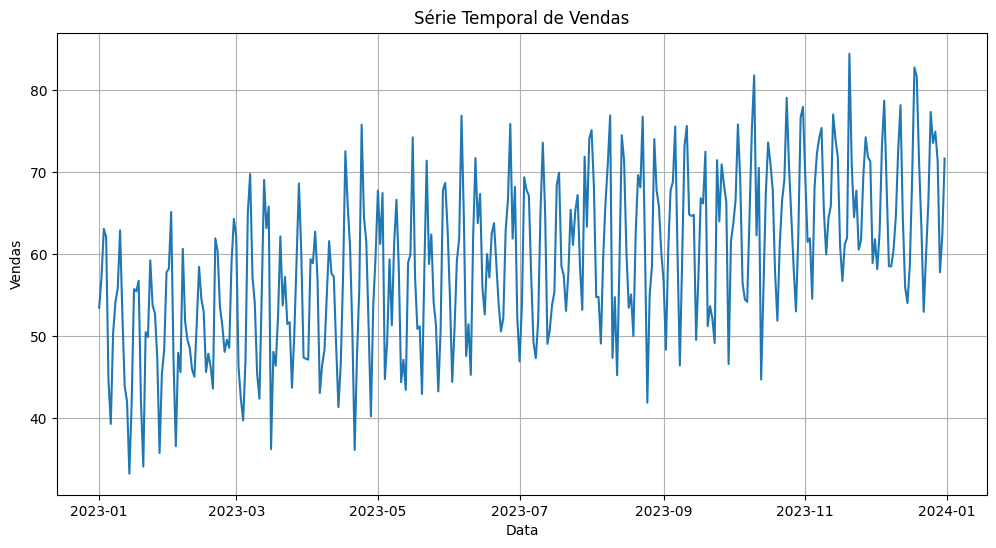

In [18]:
plt.figure(figsize = (12,6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show()


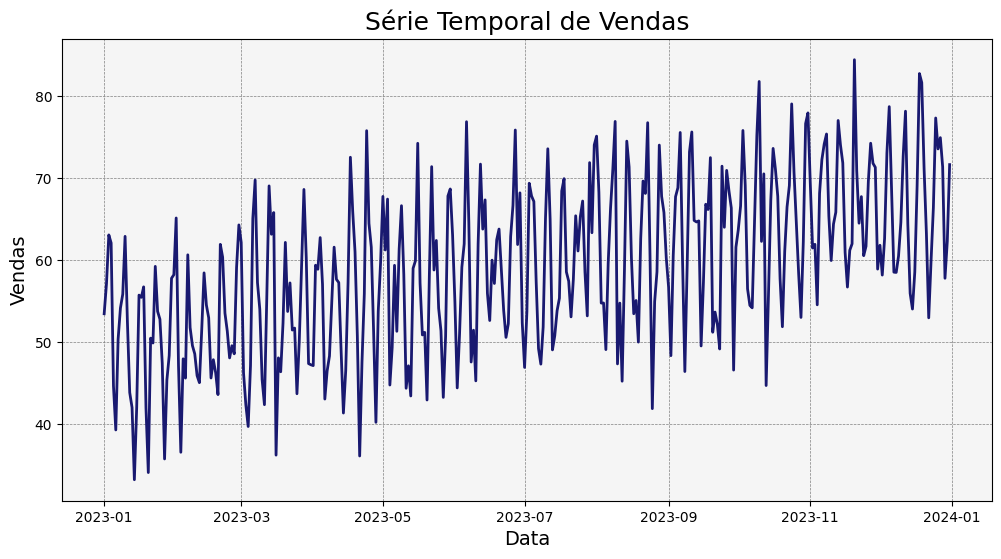

In [28]:
plt.figure(figsize = (12,6))
# Mudar cor e largura da linha
plt.plot(serie_temporal, color = 'midnightblue', linewidth = 2)

# Configurar cores e estilo do gráfico
plt.gca().set_facecolor('#f5f5f5')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color = 'black', fontsize = 14)
plt.title('Série Temporal de Vendas', color='black', fontsize = 18)

# Configurar cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors = 'black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()



## Análise e previsão de séries temporais com suavização exponencial em linguagem Python

### Suavização exponencial

- Aplica médias ponderadas aos dados históricos
  - Pesos diminuem exponencialmente à medida que os dados ficam mais antigos
- Útil para:
  - Lidar com tendências e sazonalidades
  - Diminuir ruído

#### Suposições da suavização exponencial

- No Statsmodels, a classe SimpleExpSmoothing implementa uma técnica de suavização exponencial simples.
- Ele traz as seguintes suposições:
    - A série temporal é composta por um componente de nível (média) e um componente de erro (ruído). Não há componentes de tendência ou sazonalidade.
    - O componente de nível é uma média ponderada dos valores passados, com pesos que diminuem exponencialmente à medida que os dados ficam mais distantes no passado.
    - O componente de erro aleatório é normalmente distribuído com média zero e variância constante. Além disso, erros são independentes e identicamente distribuídos.
    - O parâmetro de suavização (alfa) é uma constante entre 0 e 1, que determina a taxa de decaimento dos pesos. Valores próximos a 1 dão maior peso aos dados mais recentes, enquanto valores próximos a 0 dão mais peso aos dados mais antigos.
- Esse modelo é mais adequado a séries temporáris que *não* apresentam tendências ou sazonalidades claras e para fazer previsões de curto prazo.
- Para séries temporáis com tendência ou sazonalidade, é melhor usar modelos mais avançados como ExpontentialSmoothing de Holt-Winters ou modelos SARIMA

In [29]:
# Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

In [30]:
# Treinamento (ajuste) do modelo
modelo_ajustado = modelo.fit(smoothing_level= 0.2)

c:\Users\Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [31]:
# Extrai valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

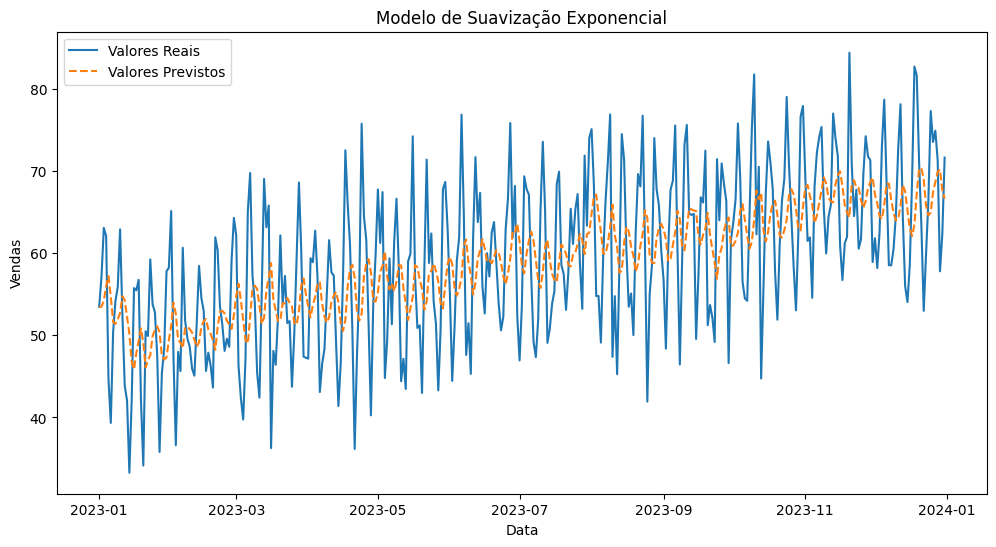

In [32]:
# Plot
plt.figure(figsize = (12,6))
plt.plot(serie_temporal, label = 'Valores Reais')
plt.plot(suavizacao_exponencial, label='Valores Previstos', linestyle = '--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

### Deploy e previsão com modelo de séries temporais

- Forecast: previsão de pontos de dados no futuro
- Janela de previsões: quanto tempo no futuro será previsto
  - Quanto maior a janela de previsões, menor a capacidade preditiva do modelo

In [34]:
# Fazer previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps= num_previsoes)

In [35]:
print('Previsão do Total de Vendas para Janeiro/2024:', round(previsoes[0],4))

Previsão do Total de Vendas para Janeiro/2024: 67.6499


C:\Users\Pedro\AppData\Local\Temp\ipykernel_15760\2184558557.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Previsão do Total de Vendas para Janeiro/2024:', round(previsoes[0],4))
